In [1]:
# ================================================================
# BOOTSTRAP CELL FOR Disease_Classifier.ipynb
# Loads ML dependencies & mounts Drive
# ================================================================

!pip install pandas numpy scikit-learn matplotlib joblib --quiet

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from google.colab import drive
drive.mount('/content/drive')

print("✅ Classifier Notebook Bootstrap Loaded Successfully")


Mounted at /content/drive
✅ Classifier Notebook Bootstrap Loaded Successfully


# **Disease Classifier for Childhood Illnesses**  
### Using Random Forest (Pneumonia, Malaria, Diarrhoea)
### Notebook: Disease_Classifier.ipynb

This notebook trains a machine learning classifier that predicts the most likely
childhood disease based on structured symptoms extracted by the NLP Engine.

The dataset used is a synthetic IMCI-inspired dataset generated earlier in:
`Synthetic_Dataset_Generator.ipynb`.

Model Type:
- **Random Forest Classifier** — chosen for robustness, high accuracy, and ease of interpretation.

Output:
- A trained `.pkl` model saved in Google Drive for reuse in the integrated system.


## **Mount Google Drive**

We mount Google Drive to access:
- The synthetic dataset
- The folder where we will save our trained Random Forest model

This ensures that all notebooks (NLP, dataset generator, classifier, KG) share
the same project directory.


In [9]:
from google.colab import drive

# Mount Google Drive for file access
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Import Required Libraries**

These are the libraries needed for:
- Loading and handling the dataset
- Training the Random Forest model
- Splitting the data into train/test sets
- Evaluating the model
- Saving the trained model as an artifact


In [ ]:
import pandas as pd                         # For dataset loading and manipulation
import numpy as np                          # Numerical utilities

from sklearn.model_selection import train_test_split   # Split data into train/test sets
from sklearn.ensemble import RandomForestClassifier    # Our chosen ML model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import joblib                                # Used to save the trained model
import os                                    # For file and folder management


## **Load the Dataset**

We now load the dataset  in the notebook:


Path:
`/content/drive/MyDrive/Colab Notebooks/Model Notebooks/datasets/child_disease_dataset.csv`

This dataset contains:
- Symptom features (binary)
- Metadata (age, duration)
- Disease labels (pneumonia, malaria, diarrhea)


In [10]:
# Define path to dataset
dataset_path = "/content/drive/MyDrive/Colab Notebooks/Model Notebooks/datasets/child_disease_dataset.csv"

# Load dataset into a DataFrame
df = pd.read_csv(dataset_path)

# Show first rows for verification
df.head()


,fever,cough,fast_breathing,diarrhea,vomiting,weakness,poor_feeding,convulsions,age,duration,disease
0,1,1,1,1,0,1,0,0,1,3,pneumonia
1,1,0,1,1,1,1,0,0,4,1,malaria
2,1,0,0,1,1,0,0,0,4,2,diarrhea
3,0,1,1,0,0,0,0,0,1,2,pneumonia
4,1,1,1,0,1,0,1,0,3,2,malaria


## **Prepare Features (X) and Labels (y)**

We separate:
- **X** = all symptom features + metadata  
- **y** = disease label

Machine learning models require inputs (X) and outputs (y).


In [ ]:
# Features (all columns except disease)
X = df.drop("disease", axis=1)

# Labels (the column we want to predict)
y = df["disease"]

X.shape, y.shape


((1800, 10), (1800,))

## **Split Dataset Into Train and Test Sets**

We divide the data into:
- 80% training (used to teach the model)
- 20% testing (used to evaluate performance on unseen data)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, shuffle=True
)

X_train.shape, X_test.shape


((1440, 10), (360, 10))

## **Train the Random Forest Classifier**

Random Forest works well because:
- Handles binary symptom features
- Handles noise in the synthetic dataset
- Produces high accuracy
- Easy to interpret


In [ ]:
# Initialize the Random Forest model
rf = RandomForestClassifier(
    n_estimators=200,     # Number of trees in the forest
    max_depth=None,       # Let trees grow naturally
    random_state=42       # Makes training reproducible
)

# Train the model
rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

## **Evaluate Model Performance**

We check:
- Accuracy
- Confusion matrix
- Precision, recall, F1-score

This shows how well the classifier distinguishes:
- Pneumonia
- Malaria
- Diarrhoea


In [ ]:
# Generate predictions
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8444444444444444

Classification Report:
               precision    recall  f1-score   support

    diarrhea       0.88      0.74      0.81       129
     malaria       0.72      0.82      0.77       110
   pneumonia       0.94      0.98      0.96       121

    accuracy                           0.84       360
   macro avg       0.85      0.85      0.84       360
weighted avg       0.85      0.84      0.84       360


Confusion Matrix:
 [[ 96  32   1]
 [ 13  90   7]
 [  0   3 118]]


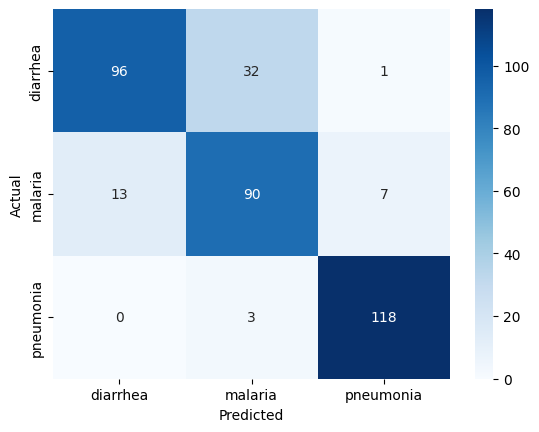

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [11]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import pandas as pd

dataset_path = "/content/drive/MyDrive/Colab Notebooks/Model Notebooks/datasets/child_disease_dataset.csv"
df = pd.read_csv(dataset_path)


In [13]:
from sklearn.model_selection import train_test_split

X = df.drop("disease", axis=1)
y = df["disease"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)


In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [15]:
import joblib
import os

model_path = "/content/drive/MyDrive/Colab Notebooks/Model Notebooks/model_artifacts/"
os.makedirs(model_path, exist_ok=True)

save_file = model_path + "child_disease_random_forest.pkl"

joblib.dump(rf, save_file)

print("Model SAVED to:", save_file)


Model SAVED to: /content/drive/MyDrive/Colab Notebooks/Model Notebooks/model_artifacts/child_disease_random_forest.pkl


In [16]:
os.listdir("/content/drive/MyDrive/Colab Notebooks/Model Notebooks/model_artifacts/")


['child_disease_random_forest.pkl']